### <b> Dominik Szot <br> Laboratorium 03 <br> Interpolacja </b>

<b> Zadanie 1. </b>
Populacja Stanów Zjednoczonych na przestrzeni lat przedstawiała się następująco:

<center>

| Rok |Populacja |
| :-: | :-: |
|1900|  76 212 168|
|1910|  92 228 496|
|1920| 106 021 537|
|1930| 123 202 624|
|1940| 132 164 569|
|1950| 151 325 798|
|1960| 179 323 175|
|1970| 203 302 031|
|1980| 226 542 199|

</center>

Istnieje dokładnie jeden wielomian ósmego stopnia, który interpoluje powyższe dziewięć punktów, <br> 
natomiast sam wielomian może być reprezentowany na różne sposoby. Rozważamy następujące zbiory funkcji bazowych $ {\phi}_j(t)$,
$ j = 1,...,9: $

$$
    {\phi}_j(t) = t^{j-1} \\
    {\phi}_j(t) = (t-1900)^{j-1} \\ 
    {\phi}_j(t) = (t-1940)^{j-1} \\ 
    {\phi}_j(t) = ((t-1940)/40)^{j-1} \\ 
$$

* (a) Dla każdego z czterech zbiorów funkcji bazowych utwórz macierz Vandermonde’a.

* (b) Oblicz współczynnik uwarunkowania każdej z powyższch macierzy, używając funkcji `numpy.linalg.cond`.

* (c) Używając najlepiej uwarunkowanej bazy wielomianów, znajdź współczynniki wielomianu interpolacyjnego dla danych z zadania. <br> 
Narysuj wielomian interpolacyjny. W tym celu użyj schematu Hornera i oblicz na przedziale
[1900,1990] wartości wielomianu w odstępach jednorocznych. Na wykresie
umieść także węzły interpolacji.

* (d) Dokonaj ekstrapolacji wielomianu do roku 1990. Porównaj otrzymaną wartość z prawdziwą wartością dla roku 1990, wynoszącą 248 709 873. <br>
Ile wynosi błąd względny ekstrapolacji dla roku 1990?

* (e) Wyznacz wielomian interpolacyjny Lagrange’a na podstawie 9 węzłów interpolacji podanych w zadaniu. <br> 
Oblicz wartości wielomianu w odstępach jednorocznych.

* (f) Wyznacz wielomian interpolacyjny Newtona na podstawie tych samych węzłów interpolacji i oblicz wartości wielomianu w odstępach jednorocznych.

* (g) Zaokrąglij dane podane w tabeli do jednego miliona. Na podstawie takich danych wyznacz wielomian interpolacyjny ósmego stopnia, <br> 
używając najlepiej uwarunkowanej bazy z podpunktu (c). Porównaj wyznaczone współczynniki z współczynnikami obliczonymi w podpunkcie (c). <br> 
Wyjaśnij otrzymany wynik.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp

In [3]:
years = np.array([1900,1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
points = np.array([76212168, 92228496, 106021537, 123202624, 132164569,  151325798, 179323175,  203302031,  226542199])

Macierz Vandermonde'a jest macierzą postaci 

$$ \begin{bmatrix}
    1 & x_1 & \cdots & x_1^{n-1} \\ 
    1 & x_2 & \cdots & x_2^{n-1} \\ 
    \vdots &  \vdots  & \ddots  & \vdots \\
    1 & x_n & \cdots & x_n^{n-1}
\end{bmatrix} $$


Macierz Vandermonde'a dla każdej z czeterch funkcji bazowych będzie miała postać 


$$ \begin{bmatrix}
    \phi_1(t_1) & \phi_2(t_1) & \cdots & \phi_n(t_1) \\ 
    \phi_1(t_2) & \phi_2(t_2) & \cdots & \phi_n(t_2) \\ 
    \vdots &  \vdots  & \ddots  & \vdots \\
    \phi_1(t_n) & \phi_2(t_n) & \cdots & \phi_n(t_n) \\ 
\end{bmatrix} $$

Używając funkcji `numpy.linalg.cond` jesteśmy w stanie wyznaczyc współczynnik uwarunkowania każdej macierzy.

In [4]:
def createVanderMonde(data, function):
    matrix_array = np.zeros((9,9))
    
    for i in range(9):
        for j in range(9):
            matrix_array[i][j] = pow(function(data[i]), j) 
    
    return matrix_array

In [5]:
function_01 = lambda x: x
matrix_01 = createVanderMonde(years, function_01)

function_02 = lambda x: (x - 1900)
matrix_02 = createVanderMonde(years, function_02)

function_03 = lambda x: (x - 1940)
matrix_03 = createVanderMonde(years, function_03)

function_04 = lambda x: (x - 1940)/40
matrix_04 = createVanderMonde(years, function_04)

In [6]:
cond1 = np.linalg.cond(matrix_01)
cond2 = np.linalg.cond(matrix_02)
cond3 = np.linalg.cond(matrix_03)
cond4 = np.linalg.cond(matrix_04)

print(cond1, cond2, cond3, cond4)

5.03118434086647e+26 6306532437721114.0 9315536053440.451 1605.4437004786996


<center>

| Funkcja Bazowa | Współczynnik Uwarunkowania |
| :-: | :-: | 
| 1. | 5.03118434086647e+26| 
| 2. | 6306532437721114.0 | 
| 3. | 9315536053440.451 | 
| 4. | 1605.4437004786996 | 


</center>

Najlepiej uwarunkowana okazała się funkcja $ (4) $ 

$$
    \phi_j(t) = ((t-1940)/40)^{j-1}
$$


Współczynniki wielomianu interpolacyjnego $ c_1,...,c_n $ znajdziemy rozwiązując równanie 

$$ \begin{bmatrix}
    1 & x_1 & \cdots & x_1^{n-1} \\ 
    1 & x_2 & \cdots & x_2^{n-1} \\ 
    \vdots &  \vdots  & \ddots  & \vdots \\
    1 & x_n & \cdots & x_n^{n-1}
\end{bmatrix} 

 \begin{bmatrix}
    c_1 \\ 
    c_2 \\ 
    \vdots \\
    c_n 
\end{bmatrix}

= 

\begin{bmatrix}
    y_1 \\ 
    y_2 \\ 
    \vdots \\
    y_n 
\end{bmatrix} $$

Gdzie $(x_1, y_1),...,(x_n, y_n)$ są punktami interpolacji wielomianu. Korzystając z algorytmu Hornera do wyliczenia wartości wielomianu dla konkretnego x 

$$
    W(x) = (...(a_nx+a_{n-1})x + ... + a_1)x + a_0
$$

czyli: 
$$
    W_n = a_n, \\ 
    W_i = W_{i+1}x + 1_i, \ i = n-1, n-2, ... , 0 \\ 
    W(x) = W_0
$$
otrzymujemy: 
* n-mnożeń, n-dodawań 
* numerycznie poprawny (wskaźnik kumulacji $ \approx 2x + 1$)

Jesteśmy w stanie obliczyć wartości wielomianu w odstępach jednorocznych na przedziale $ [1900, 1990] $

In [7]:
def horner(L, x):
    i = len(L) - 1
    result = L[i]
    while i > 0:
        i = i - 1
        result = result*x + L[i]
        
    return result

In [8]:
import matplotlib.ticker

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
}

def draw_population(years, population, new_years, new_population, title):
    plt.plot(new_years, new_population, label="Wykres populacji")
    plt.plot(years, population, ".", markersize = 10, color = "red", label="Węzeł interpolacji")
    plt.legend(loc="upper left")

    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
    plt.title(title, fontdict=font, pad=10)
    plt.xlabel("Rok", fontdict=font, labelpad=10)
    plt.ylabel("Populacja", fontdict=font, labelpad=10)
    plt.show()

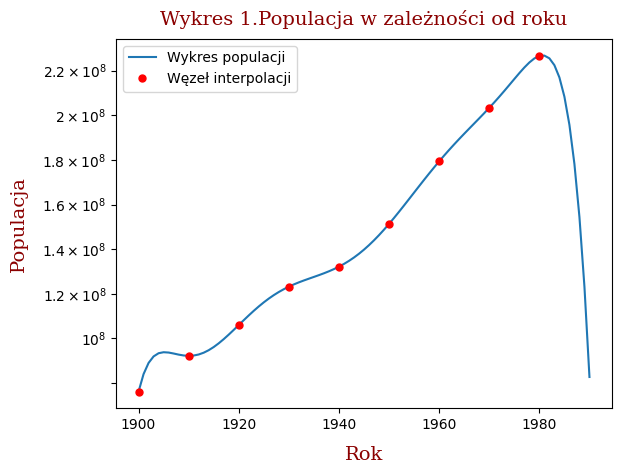

In [9]:
import matplotlib.ticker
cooeficient_vector = np.dot(np.linalg.inv(matrix_04), points)

new_years = np.arange(1900, 1991, 1)
new_points = np.zeros(len(new_years))

for i in range(len(new_years)):
    new_points[i] = horner(cooeficient_vector, function_04(new_years[i]))

plt.plot(new_years, new_points, label="Wykres populacji")
plt.plot(years, points, ".", markersize = 10, color = "red", label="Węzeł interpolacji")
plt.legend(loc="upper left")

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.title("Wykres 1.Populacja w zależności od roku", pad=10, fontdict=font)
plt.xlabel("Rok",  labelpad=10, fontdict=font)
plt.ylabel("Populacja", labelpad=10, fontdict=font)
plt.show()


In [10]:
print(new_points[90])
print(np.abs(new_points[90] - 248709873))

82749141.00001292
165960731.99998707


<center>

Porównanie wartości ekstrapolacji dla roku 1990

| Wartość oczekiwana | Wartość ekstrapolowana | Błąd Względny | 
| :-: | :-: | :-: |
| 248709873 | 82749141 | 165960732 |

</center>

Wielomian interpolacyjny Lagrange'a n-tego stopnia 

Szukamy wielomianu $ P_n(x) $ przechodzącego przez punkty $ x_0, x_1, ... , x_n$ 

$$ 
   L_k(x_i) = \delta_{k,l} = 
   
    \left\{\begin{matrix}
        1 \ \ if \ \ j = i (**) \\ 
        0 \ \ if \ \ i \neq j (*) 
    \end{matrix}\right. \ \ dla \ k \in {0, 1, ..., n}
$$

$$ 
    (*) - licznik \ \ d \\
    d = (x - x_0)(x - x_1)...(x-x_{k-1})!(x-x_{k+1})...(x-x_n)
$$

$$ 
    (**) - mianownik \ \ m \\
    m = (x_k - x_0)(x_k - x_1)...(x_k-x_{k-1})!(x_k-x_{k+1})...(x_k-x_n)
$$

$$ 
   L_k(x) = \frac {d} {m} = \prod_{i=0, i \neq k}^n \frac {x - x_i} {x_k - x_i}
$$

$$
    P_n(x) = \Sigma_{k=0}^n f(x_k) L_k(x)
$$

Cechy interpolacji ze wzoru Lagrange'a: 
* (+) łatwo utworzyć wzór 
* (-) przy dodawaniu nowego węzła musimy wyliczać wszystko od początku 
* (-) przy obliczaniu wartości w konkretnym punkcie musimy powtórzyć obliczanie licznika dla L_k(x)

In [11]:
def lagrange_interpolation(x_values, y_values, x):
    result = 0
    for j in range(len(x_values)):
        coefficient = 1
        for k in range(len(y_values)):
            if j != k:
                coefficient *= (x-x_values[k])/(x_values[j] - x_values[k])

        result += coefficient * y_values[j]

    return result

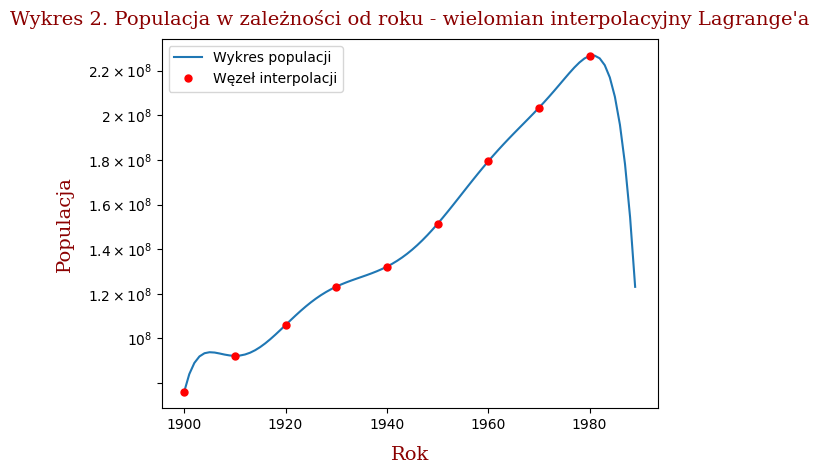

In [12]:
new_years_lagrange = np.arange(1900, 1990, 1)
new_points_lagrange = [lagrange_interpolation(years, points, 1900+i) for i in range(len(new_years_lagrange))]

plt.plot(new_years_lagrange, new_points_lagrange, label="Wykres populacji")
plt.plot(years, points, ".", markersize = 10, color = "red", label="Węzeł interpolacji")
plt.legend(loc="upper left")

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.title("Wykres 2. Populacja w zależności od roku - wielomian interpolacyjny Lagrange'a", fontdict=font, pad=10)
plt.xlabel("Rok", fontdict=font, labelpad=10)
plt.ylabel("Populacja", fontdict=font, labelpad=10)
plt.show()

Metoda ilorazów różnicowych:

Wprowadzamy notację:
* 0-wy iloraz róznicowy wzgl. $ x_i : f[x_i] = f(x_i) $
  pozostałe - indukcyjnie : 
* 1-szy: 
$$
    f[x_i, x_{i+1}] = \frac {f[x_{i+1}] - f[x_i]} {x_{i+1} - x_i}
$$

Gdy ilorazy określona są do $ (k-1) $, czyli 

$$ 
    f[x_i, x_{i+1}, x_{i+k-1}] \ \ i \ \ f[x_{i+1}, x_{i+2}, x_{i+k}]
$$

* to k-ty iloraz różnicowy:

$$ 
    f[x_i, ..., x_{i+k}] = \frac {f[x_{i+1}, x_{i+2}, ... , x_{i+k}] - f[x_i, x_{i+1}, ... , x_{i+k-1}]} {x_{i+k} - x_i}
$$

<b> Interpolacyjny wzór Newtona z ilorazami różnicowymi: </b>

$$ 
    P_{n}(x) = f[x_0] + \Sigma^n_{k=1}f[x_0, x_1, ... , x_k](x-x_0)...(x-x_{k-1}) 
$$

In [13]:
def newton_interpolation(points, years):
    newton_basis = np.zeros((len(points), len(points)))
    
    for i in range(len(newton_basis)):
        newton_basis[i][0] = 1
        
    for i in range(1, len(newton_basis)):
        for j in range(1, i+1):
            actual = years[i] - years[j-1]
            newton_basis[i][j] = actual * newton_basis[i][j-1]
            
    return newton_basis

In [14]:
new_x_values = np.arange(1900, 1991, 1, dtype="int64")
new_y_values = np.zeros(len(new_x_values), dtype="int64")

In [15]:
newton_basis = np.zeros((len(points), len(points)))
for i in range(len(newton_basis)):
        newton_basis[i][0] = 1
        
for i in range(1, len(newton_basis)):
    for j in range(1, i+1):
        coeff = years[i] - years[j-1]
        newton_basis[i][j] = coeff * newton_basis[i][j-1]

coefficient_newton = np.dot(np.linalg.inv(newton_basis), points)

for n in range(len(new_y_values)):
    acutal = 1
    result = coefficient_newton[0]
    for j in range(1, len(points)):
        acutal *= (new_x_values[n] - years[j-1])
        result += coefficient_newton[j] * acutal
    new_y_values[n] = result

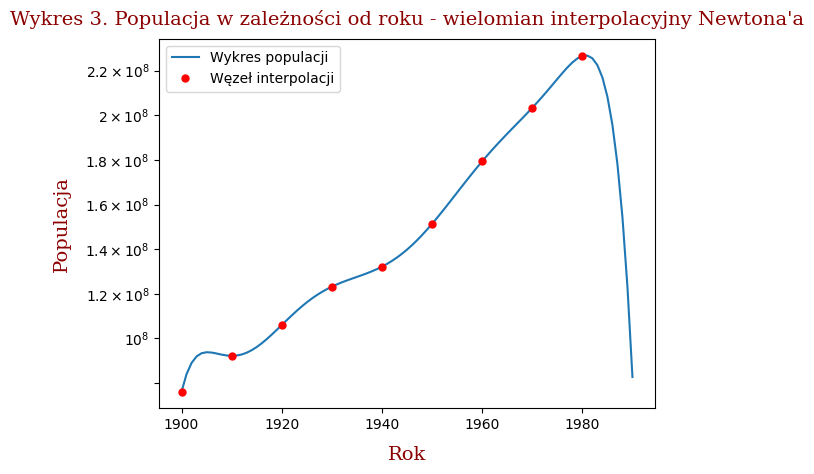

In [16]:
plt.plot(new_x_values, new_y_values, label="Wykres populacji")
plt.plot(years, points, ".", markersize = 10, color = "red", label="Węzeł interpolacji")
plt.legend(loc="upper left")

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.title("Wykres 3. Populacja w zależności od roku - wielomian interpolacyjny Newtona'a", fontdict=font, pad=10)
plt.xlabel("Rok", fontdict=font, labelpad=10)
plt.ylabel("Populacja", fontdict=font, labelpad=10)
plt.show()

<center>

<b> Tabela 4. </b> Zaokrąglone dane do jednego miliona

| Rok |Populacja |
| :-: | :-: |
|1900|  76 000 000|
|1910|  92 000 000|
|1920| 106 000 000|
|1930| 123 000 000|
|1940| 132 000 000|
|1950| 151 000 000|
|1960| 179 000 000|
|1970| 203 000 000|
|1980| 227 000 000|

</center>

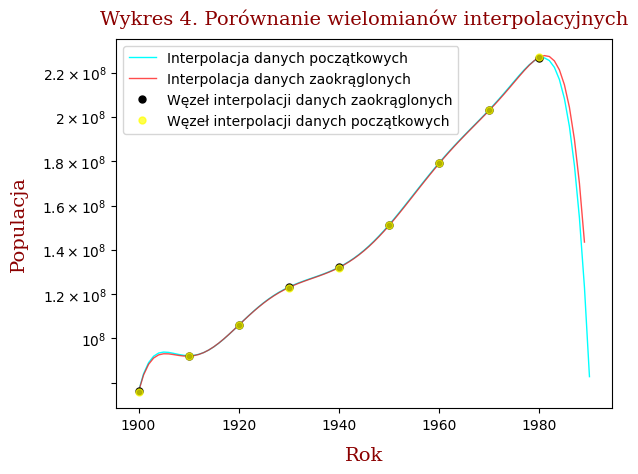

In [17]:
points_rounded = [np.round(i/10.**6)*10**6 for i in points]
cooeficient_vector_2 = np.dot(np.linalg.inv(matrix_04), points_rounded)

new_years_2 = np.arange(1900, 1990, 1)
new_points_2 = np.zeros(len(new_years_2))

for i in range(len(new_years_2)):
    new_points_2[i] = horner(cooeficient_vector_2, function_04(new_years_2[i]))
    
plt.plot(new_years, new_points, linewidth=1,  color="cyan", label="Interpolacja danych początkowych")
plt.plot(new_years_2, new_points_2, linewidth=1, color="red", alpha=0.7, label="Interpolacja danych zaokrąglonych")
plt.plot(years, points, ".", markersize = 10, color = "black", label="Węzeł interpolacji danych zaokrąglonych")
plt.plot(years, points_rounded, ".", markersize = 10, color = "yellow", alpha=0.7, label="Węzeł interpolacji danych początkowych")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.title("Wykres 4. Porównanie wielomianów interpolacyjnych", fontdict=font, pad=10)
plt.xlabel("Rok", fontdict=font, labelpad=10)
plt.ylabel("Populacja", fontdict=font, labelpad=10)
plt.legend(loc="upper left")

plt.show()
